<a href="https://colab.research.google.com/github/egrudskova/hse-nlp-fp/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of the final project

## Introduction

This project is devoted to the question-answering task. You are going to work with the **BoolQ** dataset from SuperGLUE .

BoolQ is a question answering dataset for yes/no.

Each example is a triplet of (question, passage, answer), with the title of the page as optional additional context. The dataset release consists of three `.jsonl` files (`train, val, test`), where each line is a JSON dictionary with the following format:

    Example:
    
    {
      "question": "is france the same timezone as the uk",
      "passage": "At the Liberation of France in the summer of 1944, Metropolitan France kept GMT+2 as it was the time then used by the Allies (British Double Summer Time). In the winter of 1944--1945, Metropolitan France switched to GMT+1, same as in the United Kingdom, and switched again to GMT+2 in April 1945 like its British ally. In September 1945, Metropolitan France returned to GMT+1 (pre-war summer time), which the British had already done in July 1945. Metropolitan France was officially scheduled to return to GMT+0 on November 18, 1945 (the British returned to GMT+0 in on October 7, 1945), but the French government canceled the decision on November 5, 1945, and GMT+1 has since then remained the official time of Metropolitan France."
      "label": false,
      "idx": 123,
    }

For this project you will need only `train` and `val` parts.

Dataset is available here: https://dl.fbaipublicfiles.com/glue/superglue/data/v2/BoolQ.zip

Detailed task description is available here: https://arxiv.org/abs/1905.10044

## Bonus for those, who want to work with Russian

For those who want to work with Russian data there is an option to use **DaNetQA** dataset (instead of BoolQ) from Russsian SuperGLUE. The dataset is organised similarly to BoolQ.

You may download data from here: https://russiansuperglue.com/tasks/download/DaNetQA

Detailed task description is available here: https://arxiv.org/abs/2010.02605


**Note:** note that you should take only one dataset (either BoolQ or DanetQA). There are no bonus points for solving both tasks.


## Detailed Task Description

In the task you should perform all the model training on `train.jsonl` data and evaluate your models on `val.jsonl`. Note that you do not need `test.jsonl`.

Use **accuracy metric** for scoring.

The solution of either BoolQ or DaNetQA should include:


### [10%] 1. Data analysis


* 1.1  (10%) Download the data and calculate basic statistics (example number, class distribution, mean sentence length, number of unique words, etc.) and make visualizations, if necessary.


### [40%] 2. Pretrained embeddings as features for classifier
* 2.1 (5%) Take pre-trained word2vec or fastText embeddings and vectorize your data using them.

**Note:** you may use any pre-trained embeddings available on the Internet. For example, for English you may take GoogleNews vectors, which are available here: https://www.kaggle.com/leadbest/googlenewsvectorsnegative300 . For the Russian language you may choose one of the models from RusVectores (https://rusvectores.org/ru/models/).

* 2.2  (15%) Use pretrained embeddings as features to a classifier. Train SVM, Linear Regression or any other classification model. Describe and analyze your results (use accuracy metric and data from `val.jsonl` for evaluation of your results).

* 2.3 (5%) Instead of word2vec or fastText embeddings get BERT embeddings from the train dataset and vectorize your data.

**Note:** you may use any of the BERT-like models from hugging face (https://huggingface.co/) library. For example, you may use `bert-base-multilingual-cased` (https://huggingface.co/bert-base-multilingual-cased).

* 2.4  (15%) Similarly to 2.1, train SVM, Linear Regression or any other classification model using BERT embeddings as features for a classifier. Describe and analyze your results (use accuracy metric and data from `val.jsonl` for evaluation of your results).


### [40%] 3. Fine-tune BERT

* 3.1 (10%) Split the data from `train.jsonl` into train and dev (dev_size = 10%) . Tokenize and format the data (do not forget about the [SEP] token).

* 3.2   (10%) Initialize the model, optimizer and learning rate scheduler. Explain your choice of the parameters.

* 3.3   (10%) Write a training loop and fine-tune BERT. Do to forget about evaluation on dev set created in 3.1.

**Note:** you may use one of the tutorials for fine-tuning BERT, but you have to provide a link to it. For example, you may use this one: https://mccormickml.com/2019/07/22/BERT-fine-tuning/

* 3.4   (10%)  Make predictions for the test data (from `val.jsonl`),  and analyze the results (use accuracy metric for scoring).



### [10%] 4. Summary & results analysis


* 4.1    (5%) Compare the results of all the tested models and try to interpret them.

* 4.2    (5%) Propose, how you may improve the model score (write at least three ideas).


### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Provide links to the tutorials you use for reference.


# Solution



## 1. Data analysis

In [ ]:
# Load and read data

import json
import pandas as pd

google_drive_path = '/content/drive/MyDrive/'

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

train_df = load_jsonl(google_drive_path + 'train.jsonl')
val_df = load_jsonl(google_drive_path + 'val.jsonl')


In [ ]:
# Calculate basic statistics

def basic_statistics(df, name="Dataset"):
    print(f"=== {name} Statistics ===")
    print(f"Total examples: {len(df)}")
    print(f"Class distribution:\n{df['label'].value_counts()}")

    df['question_len'] = df['question'].apply(lambda x: len(x.split()))
    df['passage_len'] = df['passage'].apply(lambda x: len(x.split()))

    print(f"Avg question length: {df['question_len'].mean():.2f} words")
    print(f"Avg passage length: {df['passage_len'].mean():.2f} words")

    all_words = df['question'].str.cat(sep=' ') + ' ' + df['passage'].str.cat(sep=' ')
    unique_words = set(all_words.lower().split())
    print(f"Total unique words: {len(unique_words)}")


basic_statistics(train_df, "Train")
basic_statistics(val_df, "Validation")

=== Train Statistics ===
Total examples: 9427
Class distribution:
label
True     5874
False    3553
Name: count, dtype: int64
Avg question length: 8.82 words
Avg passage length: 97.45 words
Total unique words: 80938
=== Validation Statistics ===
Total examples: 3270
Class distribution:
label
True     2033
False    1237
Name: count, dtype: int64
Avg question length: 8.71 words
Avg passage length: 96.40 words
Total unique words: 42787


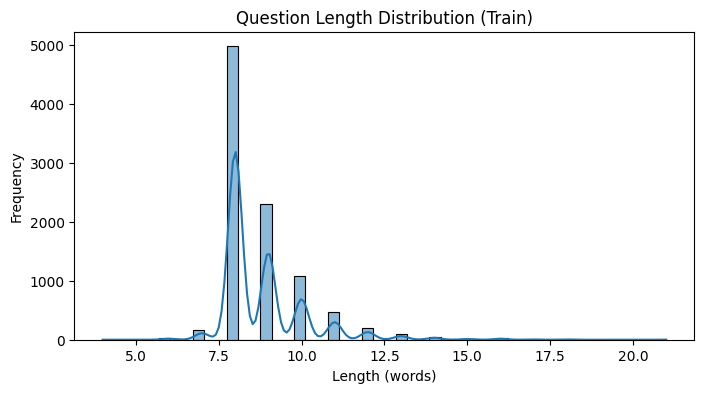

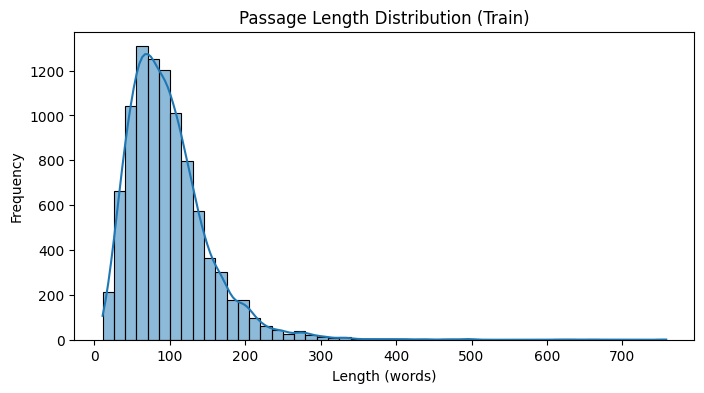

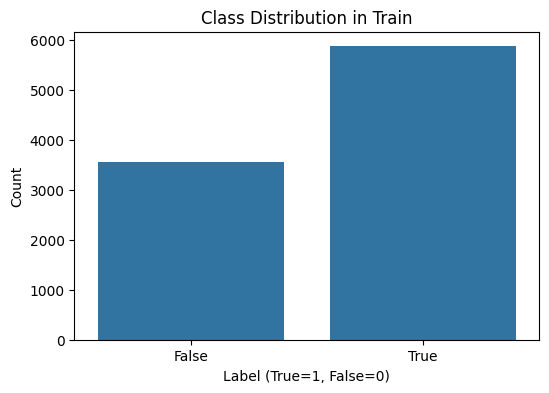

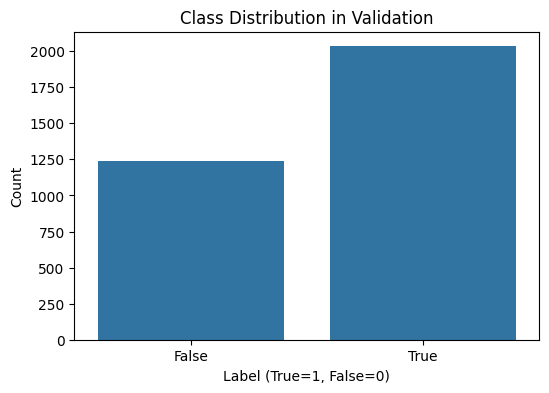

In [ ]:
# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(title)
    plt.xlabel("Length (words)")
    plt.ylabel("Frequency")
    plt.show()

plot_distribution(train_df, "question_len", "Question Length Distribution (Train)")
plot_distribution(train_df, "passage_len", "Passage Length Distribution (Train)")

def plot_class_balance(df, name):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df)
    plt.title(f'Class Distribution in {name}')
    plt.xlabel('Label (True=1, False=0)')
    plt.ylabel('Count')
    plt.show()

plot_class_balance(train_df, "Train")
plot_class_balance(val_df, "Validation")

## 2. Pretrained embeddings as features for classifier

In [ ]:
# download the model
!pip install gensim

from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format(google_drive_path + 'GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# vectorization

import numpy as np

def text_to_vector(text, model, vector_size=300):
    words = text.lower().split()
    valid_vectors = [model[word] for word in words if word in model]
    if not valid_vectors:
        return np.zeros(vector_size)
    return np.mean(valid_vectors, axis=0)

In [ ]:
# prepare datasets' features

from tqdm import tqdm

def prepare_features(df, model):
    vectors = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        text = row['question'] + ' ' + row['passage']
        vec = text_to_vector(text, model)
        vectors.append(vec)
    return np.vstack(vectors)

X_train = prepare_features(train_df, word2vec)
y_train = train_df['label'].astype(int).values

X_val = prepare_features(val_df, word2vec)
y_val = val_df['label'].astype(int).values


100%|██████████| 3270/3270 [00:02<00:00, 1414.95it/s]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_val)
acc_logreg = accuracy_score(y_val, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {acc_logreg:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_val, y_pred_logreg, target_names=["False", "True"]))

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)
print(f"Accuracy (SVM): {acc_svm:.4f}")

print("\nClassification Report (SVM):")
print(classification_report(y_val, y_pred_svm, target_names=["False", "True"]))


Accuracy (Logistic Regression): 0.6318

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.55      0.14      0.22      1237
        True       0.64      0.93      0.76      2033

    accuracy                           0.63      3270
   macro avg       0.60      0.53      0.49      3270
weighted avg       0.61      0.63      0.55      3270

Accuracy (SVM): 0.6217

Classification Report (SVM):
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1237
        True       0.62      1.00      0.77      2033

    accuracy                           0.62      3270
   macro avg       0.31      0.50      0.38      3270
weighted avg       0.39      0.62      0.48      3270



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using pretrained Word2Vec embeddings (GoogleNews-vectors-negative300) and a Logistic Regression classifier, we obtained an accuracy of 0.6318 on the validation set. While this performance is better than the SVM model, which scored 0.6217, it still indicates that the model is not performing optimally. The low accuracy suggests that the embeddings alone may not capture the nuances of the task, and the model could benefit from further enhancements, such as fine-tuning or incorporating more complex features. Additionally, challenges such as class imbalance may also be influencing the model's ability to correctly predict both classes

In [ ]:
# load BERT model

from transformers import BertTokenizer, BertModel
import torch

model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)
bert_model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [ ]:
def get_bert_embedding(text, tokenizer, model, device='cpu'):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

In [ ]:
from tqdm import tqdm
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = bert_model.to(device)

def prepare_bert_features(df):
    embeddings = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        text = row['question'] + " " + row['passage']
        vec = get_bert_embedding(text, tokenizer, bert_model, device)
        embeddings.append(vec)
    return np.vstack(embeddings)

X_train_bert = prepare_bert_features(train_df)
X_val_bert = prepare_bert_features(val_df)

y_train_bert = train_df['label'].astype(int).values
y_val_bert = val_df['label'].astype(int).values


100%|██████████| 3270/3270 [00:43<00:00, 74.57it/s]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bert, y_train_bert)
y_pred_logreg = log_reg.predict(X_val_bert)
acc_logreg = accuracy_score(y_val_bert, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {acc_logreg:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_val_bert, y_pred_logreg, target_names=["False", "True"]))

svm = SVC(kernel='linear')
svm.fit(X_train_bert, y_train_bert)
y_pred_svm = svm.predict(X_val_bert)
acc_svm = accuracy_score(y_val_bert, y_pred_svm)
print(f"Accuracy (SVM): {acc_svm:.4f}")

print("\nClassification Report (SVM):")
print(classification_report(y_val_bert, y_pred_svm, target_names=["False", "True"]))


Accuracy (Logistic Regression): 0.6404

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.54      0.36      0.43      1237
        True       0.68      0.81      0.74      2033

    accuracy                           0.64      3270
   macro avg       0.61      0.59      0.58      3270
weighted avg       0.62      0.64      0.62      3270

Accuracy (SVM): 0.6373

Classification Report (SVM):
              precision    recall  f1-score   support

       False       0.53      0.35      0.42      1237
        True       0.67      0.81      0.74      2033

    accuracy                           0.64      3270
   macro avg       0.60      0.58      0.58      3270
weighted avg       0.62      0.64      0.62      3270



Using Word2Vec embeddings with Logistic Regression and SVM resulted in suboptimal performance. The models struggled with class imbalance, particularly with the False class. The Logistic Regression model had a low recall for False (0.14) and a high recall for True (0.93), leading to a poor F1-score for False (0.22). Similarly, the SVM model only predicted the True class well, with a recall of 1.00 for True and 0.00 for False, highlighting its bias towards the True class.

In contrast, using BERT embeddings significantly improved the performance of both models. Logistic Regression with BERT achieved an accuracy of 0.6404, with a notable improvement in the recall for the False class (0.36). Although still better at predicting True, the model performed more balanced across both classes compared to the Word2Vec-based models. The SVM model with BERT saw a similar improvement, reaching an accuracy of 0.6373, with the False class recall improving to 0.35.

Overall, BERT embeddings provided a clear performance boost, particularly in distinguishing between classes. However, both models still faced challenges with the False class, suggesting that addressing class imbalance might further enhance the results.

## 3. Fine-tune BERT

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from torch.utils.data import Dataset

train_df_split, dev_df = train_test_split(train_df, test_size=0.1, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

class BoolQDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=512):
        self.texts = (df['question'] + " [SEP] " + df['passage']).tolist()
        self.labels = df['label'].astype(int).tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = BoolQDataset(train_df_split, tokenizer)
dev_dataset = BoolQDataset(dev_df, tokenizer)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader

batch_size = 16
epochs = 3
learning_rate = 2e-5
warmup_steps = 0

model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
model = model.to(device)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size)

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Scheduler
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)


batch_size = 16: This batch size balances memory efficiency and convergence speed, making it a common and practical choice for BERT fine-tuning on most GPUs.

epochs = 3: BERT typically converges well within 2–4 epochs; three epochs help avoid overfitting while allowing the model to learn effectively.

learning_rate = 2e-5: A standard learning rate for fine-tuning BERT; it ensures stable updates without diverging, especially with AdamW optimizer.

warmup_steps = 0: Warmup is often used with many training steps, but with a small number of epochs it can be skipped to simplify the training process without harming performance.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# 1. Load and split the data
train_texts, dev_texts, train_labels, dev_labels = train_test_split(
    (train_df['question'] + " [SEP] " + train_df['passage']).tolist(),
    train_df['label'].astype(int).tolist(),
    test_size=0.1,
    random_state=42
)

# 2. Tokenize the data
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
dev_encodings = tokenizer(dev_texts, truncation=True, padding=True, max_length=512)

# 3. Wrap into PyTorch dataset
class BoolQDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = BoolQDataset(train_encodings, train_labels)
dev_dataset = BoolQDataset(dev_encodings, dev_labels)

# 4. Load model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# 5. Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=16)

num_training_steps = len(train_dataloader) * 3  # 3 epochs
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# 6. Training loop
model.train()
for epoch in range(3):
    print(f"Epoch {epoch + 1}")
    for batch in tqdm(train_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

# 7. Evaluation
from sklearn.metrics import accuracy_score

model.eval()
preds = []
true_labels = []

for batch in tqdm(dev_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
    true_labels.extend(batch["labels"].cpu().numpy())

accuracy = accuracy_score(true_labels, preds)
print(f"Validation Accuracy (dev set): {accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


 49%|████▉     | 260/531 [06:13<06:30,  1.44s/it]

Tutorial Used:
[Chris McCormick’s BERT Fine-Tuning Tutorial (PyTorch & HuggingFace)](https://mccormickml.com/2019/07/22/BERT-fine-tuning/)